## Recession Indicator

## Motivation

Regime switching models study the financial markets propensity to often change their behavior abruptly and the phenomenon that the new behavior of financial variables often persists for several periods after such a change. While the regimes captured by regime switching models are identified by an econometric procedure, they often correspond to different periods in regulation, policy, and other secular changes. In empirical estimates, the regime switching means, volatilities, autocorrelations, and cross-covariances of asset returns often differ across regimes, which allow regime switching models to capture the stylized behavior of many financial series including fat tails, heteroskedasticity, skewness, and time-varying correlations. In equilibrium models, regimes in fundamental processes, like consumption or dividend growth, strongly affect the dynamic properties of equilibrium asset prices and can induce non-linear risk-return trade-offs. Regime switches also lead to potentially large consequences for investors' optimal portfolio choice.


This analysis was carried out to experiment with predictability of Recessions and business cycle turning points. Using various Macroeconomic data. Since 1996 when Estrella and Mishkin proposed The Yield curve as a Predictor for U.S. recessions: The yield curve—specifically, the spread between the interest rates on the ten-year Treasury
note and the three-month Treasury bill—is a valuable forecasting tool. It is simple to use and significantly outperforms other financial and macroeconomic indicators in predicting recessions two to six quarters ahead.

https://core.ac.uk/download/pdf/6867393.pdf

/Users/sturkian/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:697: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  return ax.plot(*args, **kwds)


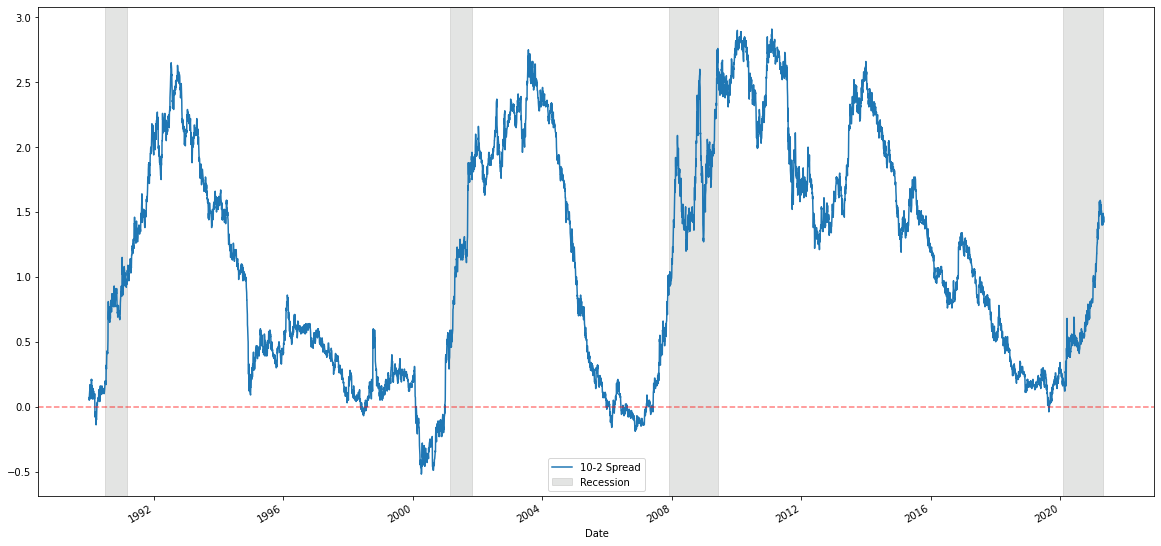

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import quandl

TY = quandl.get("USTREASURY/YIELD")
TY['10-2 Spread'] = TY['10 YR'] - TY['2 YR']
#TY['10-3 Spread'] = TY['10 YR'] - TY['3 MO']
ax = TY['10-2 Spread'].plot(figsize = (20,10), Label = "10-2 Treasury Yield Spread")

ax.axvspan("1990-07", "1991-03", color=sns.xkcd_rgb['grey'], alpha=0.25, label="Recession")

ax.axvspan("2001-03", "2001-11", color=sns.xkcd_rgb['grey'], alpha=0.25)

ax.axvspan("2007-12", "2009-06", color=sns.xkcd_rgb['grey'], alpha=0.25)

ax.axvspan("2020-02", "2021-05", color=sns.xkcd_rgb['grey'], alpha=0.25)

plt.axhline(y=0, color='r', ls='dashed', alpha = 0.5)

ax.legend()
plt.show()

/Users/sturkian/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:697: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  return ax.plot(*args, **kwds)


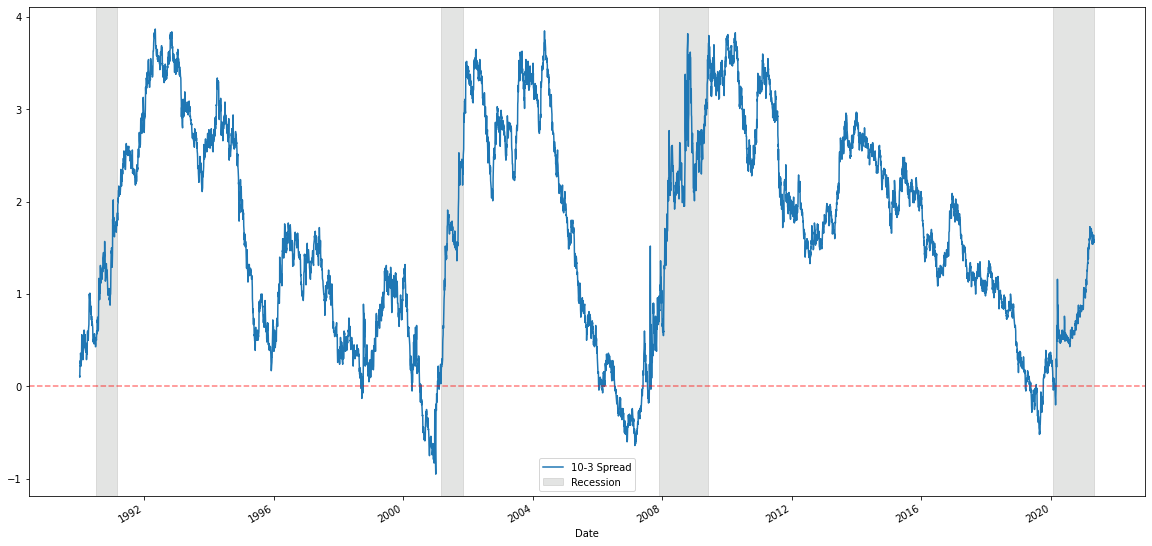

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import quandl

TY = quandl.get("USTREASURY/YIELD")
TY['10-3 Spread'] = TY['10 YR'] - TY['3 MO']

ax = TY['10-3 Spread'].plot(figsize = (20,10), Label = "10-3 Treasury Yield Spread")

ax.axvspan("1990-07", "1991-03", color=sns.xkcd_rgb['grey'], alpha=0.25, label="Recession")

ax.axvspan("2001-03", "2001-11", color=sns.xkcd_rgb['grey'], alpha=0.25)

ax.axvspan("2007-12", "2009-06", color=sns.xkcd_rgb['grey'], alpha=0.25)

ax.axvspan("2020-02", "2021-05", color=sns.xkcd_rgb['grey'], alpha=0.25)

plt.axhline(y=0, color='r', ls='dashed', alpha = 0.5)

ax.legend()
plt.show()

While others study demonstrate topic modeling algorithm and sentiment scoring methods to construct a novel metric that serves as a leading indicator in recession prediction models.
https://arxiv.org/pdf/1805.04160.pdf

In this study state of the classification technique called boosting is listed in givingwarning signals of recessions 3, 6, and 12months ahead. Boosting is used to screen as many as 1,500 potentially relevant predictors consisting of
132 real and financial time series and their lags.

https://onlinelibrary.wiley.com/doi/abs/10.1111/caje.12070


FRED-MD and FRED-QD are large macroeconomic databases designed for the empirical analysis of “big data.” The datasets of monthly and quarterly observations mimic the coverage of datasets already used in the literature, but they add three appealing features. They are updated in real-time through the FRED database. They are publicly accessible, facilitating the replication of empirical work. And they relieve the researcher of the task of incorporating data changes and revisions (a task accomplished by the data desk at the Federal Reserve Bank of St. Louis).

The accompanying papers shows that factors extracted from the FRED-MD and FRED-QD datasets share comparable information content to various vintages of so-called Stock-Watson datasets. These factor estimates are shown to be useful for forecasting a wide range of macroeconomic series. In addition, we find that diffusion indexes constructed as the partial sum of the factor estimates can potentially be useful for the study of business cycle chronology.

https://research.stlouisfed.org/econ/mccracken/fred-databases/

list of the features:
https://s3.amazonaws.com/files.research.stlouisfed.org/fred-md/FRED-QD_appendix.pdf


In [28]:
# load libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from regimeplot import *

In [31]:
macro=pd.read_csv("data_M.csv")
macro=df_macro.rename(columns={'sasdate':'Date'})
macro

,Date,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,MZMSL,DTCOLNVHFNM,DTCTHFNM,INVEST,VXOCLSx
0,Transform:,5.000,5.0,5.000,5.000000e+00,5.00000,5.0000,5.0000,5.0000,5.0000,...,6.000,6.00,6.00,6.00,2.0,6.0,6.00,6.00,6.0000,1.0000
1,1/1/1959,2437.296,2288.8,17.302,2.922588e+05,18235.77392,22.6250,23.4581,22.1904,32.4078,...,11.358,2.13,2.45,2.04,NaN,274.9,6476.00,12298.00,84.2043,NaN
2,2/1/1959,2446.902,2297.0,17.482,2.944295e+05,18369.56308,23.0681,23.7747,22.3827,32.6455,...,11.375,2.14,2.46,2.05,NaN,276.0,6476.00,12298.00,83.5280,NaN
3,3/1/1959,2462.689,2314.0,17.647,2.934254e+05,18523.05762,23.4004,23.9186,22.4925,32.6455,...,11.395,2.15,2.45,2.07,NaN,277.4,6508.00,12349.00,81.6405,NaN
4,4/1/1959,2478.744,2330.3,17.584,2.993317e+05,18534.46600,23.8989,24.2641,22.8221,33.1606,...,11.436,2.16,2.47,2.08,NaN,278.1,6620.00,12484.00,81.8099,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
738,6/1/2020,17990.747,13521.2,114.880,1.515750e+06,529962.00000,97.6071,93.9394,93.0396,98.6589,...,119.838,25.38,29.32,22.61,78.1,20979.3,334036.91,719924.00,4170.7929,30.0744
739,7/1/2020,18110.849,13713.8,116.322,1.549057e+06,535923.00000,101.6989,98.0911,97.7693,103.5054,...,120.048,25.44,29.30,22.81,72.5,21079.5,338930.02,725019.07,4290.0949,24.3785
740,8/1/2020,17609.010,13875.6,117.152,1.550404e+06,538979.00000,102.1509,99.0661,98.6480,104.2163,...,120.360,25.47,29.40,22.81,74.1,21114.7,341624.48,727855.23,4344.8069,20.2777
741,9/1/2020,17733.106,14010.5,118.599,NaN,549256.00000,101.5055,97.9490,97.3806,102.5015,...,120.741,25.42,29.07,22.94,80.4,21284.1,NaN,NaN,4396.7473,28.3241


## Approach

since this excerise presents a classification problem, regularized Logistic Regression is used.

Regularization terms can be added
1. in high dimensional problems to avoid overfitting
2. if you have prior assumptions on data – e.g. sparsity

however Linear and Logistic Regression models fail in situations where
a. the relationship between features and outcome is nonlinear
b. features interact with each other

to remedy this, tree-based models are used. Tree based models split the data multiple times according to certain cutoff values in the features. To predict the outcome in each leaf node, the average outcome of the training data in this node is used. Trees can be used for classification and regression.

In [30]:
recession=pd.read_csv('recession_dates.csv',parse_dates = ['Date'])
sp500 = pd.read_csv('sp500.csv',parse_dates =['Date'],usecols=['Date','Close'])
print('Number of recession periods in the dataset: ', recession[recession['Regime']==1].shape[0])
print('Number of expansion periods in the dataset: ', recession[recession['Regime']==0].shape[0])

recession = recession.merge(sp500,on='Date',how='left')

Number of recession periods in the dataset:  107
Number of expansion periods in the dataset:  641


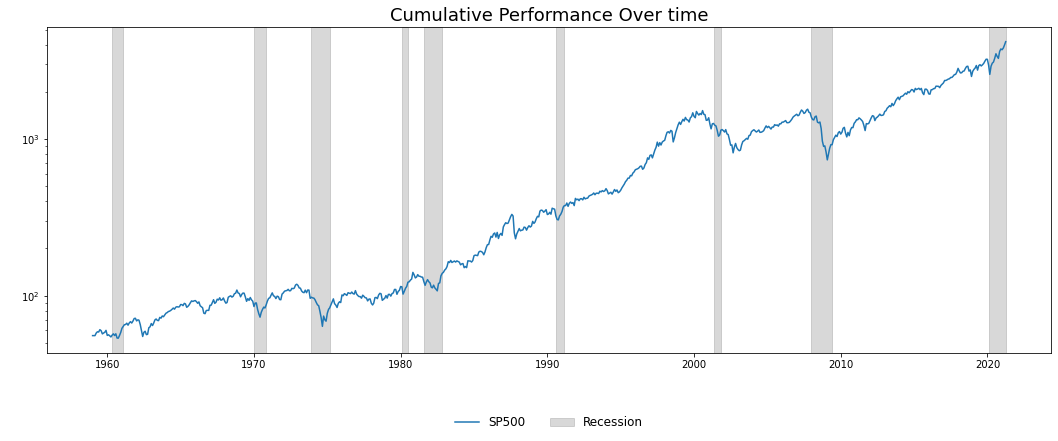

In [33]:
df = RegimePlot(df = recession,regime_col='Regime')
df.plt_regime(plt_series = ['Close'],series_label = ['SP500'],regime_label = 'Recession',orj_series = True,log_scale = True)

### Data Cleaning

In [34]:
def remove_variables(df,n):
    # if a variable has more than 'n' NaN values remove it.
    dropped_cols = []
    for col in df.columns:
        if df[col].isna().sum() > n:
            dropped_cols.append(col)
            df.drop(col, axis=1, inplace=True)
    return df,dropped_cols

In [36]:
#df_macro = pd.read_csv('data/macro_raw.csv')[:-1] #remove last row
macro = macro[:-1]
missing_num = 10
clean, dropped_cols = remove_variables(macro,missing_num)

clean.fillna(method='ffill', inplace=True)  # forward fill last month and missing values in between
clean.rename(columns={'sasdate': 'Date'}, inplace=True)
clean

,Date,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,MZMSL,DTCOLNVHFNM,DTCTHFNM,INVEST
0,Transform:,5.000,5.0,5.000,5.000000e+00,5.00000,5.0000,5.0000,5.0000,5.0000,...,6.000,6.000,6.000,6.00,6.00,6.00,6.0,6.00,6.00,6.0000
1,1/1/1959,2437.296,2288.8,17.302,2.922588e+05,18235.77392,22.6250,23.4581,22.1904,32.4078,...,56.918,17.791,11.358,2.13,2.45,2.04,274.9,6476.00,12298.00,84.2043
2,2/1/1959,2446.902,2297.0,17.482,2.944295e+05,18369.56308,23.0681,23.7747,22.3827,32.6455,...,56.951,17.798,11.375,2.14,2.46,2.05,276.0,6476.00,12298.00,83.5280
3,3/1/1959,2462.689,2314.0,17.647,2.934254e+05,18523.05762,23.4004,23.9186,22.4925,32.6455,...,57.022,17.785,11.395,2.15,2.45,2.07,277.4,6508.00,12349.00,81.6405
4,4/1/1959,2478.744,2330.3,17.584,2.993317e+05,18534.46600,23.8989,24.2641,22.8221,33.1606,...,57.080,17.796,11.436,2.16,2.47,2.08,278.1,6620.00,12484.00,81.8099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,4/1/2020,19124.430,13135.3,99.932,1.312811e+06,412766.00000,91.2658,84.7006,82.2685,87.7199,...,84.096,97.677,119.265,25.20,28.65,22.72,19635.3,319875.22,714302.54,3999.6616
737,5/1/2020,18296.406,13333.2,108.449,1.414983e+06,488218.00000,91.9327,87.6281,85.5901,90.8955,...,84.628,97.349,119.577,25.39,28.97,22.75,20729.0,326185.98,718836.96,4031.3344
738,6/1/2020,17990.747,13521.2,114.880,1.515750e+06,529962.00000,97.6071,93.9394,93.0396,98.6589,...,85.455,98.400,119.838,25.38,29.32,22.61,20979.3,334036.91,719924.00,4170.7929
739,7/1/2020,18110.849,13713.8,116.322,1.549057e+06,535923.00000,101.6989,98.0911,97.7693,103.5054,...,86.000,98.709,120.048,25.44,29.30,22.81,21079.5,338930.02,725019.07,4290.0949


In [57]:
import rec_ind

In [39]:
df = MacroDataProcess(macro_data = clean)
df.stationarity()
lag_values = [1,3,6,9,12]
df_process= df.add_lag(lag_values)
df_process.to_csv('./macro_processed.csv',index=False)
print('MacroFeatures shape:', df_process.shape)
print('Start date: '+ str(df_process.Date.iloc[0])+' End date: '+str(df_process.Date.iloc[-1]))

MacroFeatures shape: (726, 709)
Start date: 1960-03-01 00:00:00 End date: 2020-08-01 00:00:00


In [40]:
df_process

,Date,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DTCTHFNM 1M lag,DTCTHFNM 3M lag,DTCTHFNM 6M lag,DTCTHFNM 9M lag,DTCTHFNM 12M lag,INVEST 1M lag,INVEST 3M lag,INVEST 6M lag,INVEST 9M lag,INVEST 12M lag
15,1960-03-01,0.003055,0.001836,0.018399,-0.013609,0.002594,-0.017954,-0.009113,-0.004585,-0.010302,...,0.006099,0.018233,0.034111,0.034793,0.004138,-0.037926,-0.000688,-0.027018,-0.038791,-0.030921
16,1960-04-01,0.005336,0.004539,0.029454,-0.018185,0.024801,-0.016979,-0.001142,0.000000,0.008034,...,0.012437,0.012450,0.024419,0.042800,0.015011,-0.053379,-0.005654,-0.014082,-0.021701,-0.020784
17,1960-05-01,0.005829,0.006069,-0.005034,-0.021753,0.010857,-0.009104,0.007978,0.008012,0.012579,...,0.018840,0.006099,0.016845,0.041298,0.023766,-0.025753,-0.037926,-0.013266,-0.017855,-0.011197
18,1960-06-01,0.003192,0.002199,-0.020636,-0.022982,-0.016411,-0.013793,-0.005724,-0.004601,-0.001143,...,0.022225,0.012437,0.018233,0.034111,0.034793,0.002181,-0.053379,-0.000688,-0.027018,-0.038791
19,1960-07-01,0.002621,0.001656,0.001809,0.001741,-0.011463,-0.016129,-0.017175,-0.017250,-0.016038,...,0.027577,0.018840,0.012450,0.024419,0.042800,-0.004001,-0.025753,-0.005654,-0.014082,-0.021701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,2020-04-01,0.104916,-0.086919,-0.197603,-0.156758,-0.244838,-0.180289,-0.210092,-0.221896,-0.187442,...,-0.013805,-0.001731,-0.001789,0.003413,0.000300,0.039484,0.002525,0.020227,0.012218,0.018666
737,2020-05-01,0.076600,-0.047049,-0.048988,-0.044059,0.008782,-0.128342,-0.119049,-0.122228,-0.095505,...,-0.012532,-0.007984,0.001121,0.006840,0.004582,0.031573,0.011868,0.014206,0.015036,0.016372
738,2020-06-01,-0.061109,0.028956,0.139398,0.143740,0.249924,0.067174,0.103527,0.123037,0.117520,...,0.001981,-0.013805,0.000590,-0.000344,0.003472,0.008893,0.039484,0.010310,0.026829,0.011896
739,2020-07-01,-0.010193,0.028145,0.070082,0.090529,0.093228,0.100960,0.112795,0.133041,0.129913,...,0.007839,-0.012532,-0.001731,-0.001789,0.003413,0.041896,0.031573,0.002525,0.020227,0.012218


### Data set up

In [41]:
# if xgboost is not installed you can run this command in the cell
#!pip install xgboost

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import itertools
import seaborn as sns

# Classification Functions and metrics form scikit-learn library
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import TimeSeriesSplit

from regimeplot import *
import warnings
warnings.filterwarnings('ignore')

In [42]:
def dict_product(dicts):
    """
    >>> list(dict_product(dict(number=[1,2], character='ab')))
    [{'character': 'a', 'number': 1},
     {'character': 'a', 'number': 2},
     {'character': 'b', 'number': 1},
     {'character': 'b', 'number': 2}]
    """
    return (dict(zip(dicts, x)) for x in itertools.product(*dicts.values()))


def error_metrics(df, roc=False):
    """
    Four classification error metrics that will be used to evaluate model performance
    ACC: accuracy (0-1) loss
    QPS: quadratic probability score
    MCC: MAtthew's Correlation Coefficient
    AUC: Area under the ROC curve
    """
    mcc = matthews_corrcoef(y_true=df.Regime, y_pred=df.crash_binary)
    mis_rate = df[df.Regime != df.crash_binary].shape[0] / df.shape[0]
    qps = sum((df.crash_prob - df.Regime) ** 2) / len(df)
    err_dict = {'ACC': 1 - mis_rate,
                'MCC': mcc,
                'QPS': qps}
    if roc == True:
        roc = roc_auc_score(y_true=df.Regime, y_score=df.crash_prob)
        err_dict['AUC'] = roc

    return err_dict

### Cross Validation

In [43]:

model_dict_cv = {('LR', LogisticRegression): {'solver': ['saga'],
                                                      'penalty': ['none'],
                                                      'max_iter': [100]},
                ('LR_l1', LogisticRegression): {'solver': ['saga'],
                                                         'max_iter': [100],
                                                         'penalty': ['l1'],
                                                         'C': [0.0001, 0.01, 0.1, 1, 10, 100]},
                ('LR_l2', LogisticRegression): {'solver': ['saga'],
                                                         'max_iter': [100],
                                                         'penalty': ['l2'],
                                                         'C': [0.0001, 0.01, 0.1, 1, 10, 100]},
                ('DT', DecisionTreeClassifier): {'max_depth': [3, 5, 8, 10],
                                                          'splitter': ['best', 'random'],
                                                          'min_samples_split': [2, 3, 5]},
                ('RF', RandomForestClassifier): {'random_state': [42],
                                                          'max_depth': [3, 5, 8, 10],
                                                          'n_estimators': [100,200,400],  
                                                          },
                ('XGB', xgb.XGBClassifier): {'booster': ['gbtree'],
                                                      'max_depth': [3, 5, 8, 10],
                                                      'n_estimators': [100,200,400],
                                                      'random_state': [42],
                                                      'objective': ['binary:logistic']}}
       

In [47]:
df_macro = pd.read_csv('macro_processed.csv', parse_dates=['Date'])
df_regime = pd.read_csv('recession_dates.csv',parse_dates = ['Date']) # Regime column shows recession and expansion periods. (Recession label:1)
df = df_macro.merge(df_regime, on='Date',how='left')

split_date = '1973-01-01' # train and test set split date
df_train, df_test = df[df['Date'] < split_date], df[df['Date'] >= split_date]
target_col = 'Regime'
feature_col = df.columns.drop(['Regime', 'Date'])

In [48]:
%%time
scoring = 'ACC'
model_dict = {} 

for model_tuple, param_grid in model_dict_cv.items():
    all_grid = list(dict_product(param_grid))
    cv_res = []
    for param in all_grid:
        tscv = TimeSeriesSplit(n_splits=3) # timeseries split for cross validation
        model = model_tuple[1](**param)
        score = []
        for train_index, test_index in tscv.split(df_train):
            X_train, X_test = df_train[feature_col].iloc[train_index], df_train[feature_col].iloc[test_index]
            y_train, y_test = df_train[target_col].iloc[train_index], df_train[target_col].iloc[test_index]
            date_train, date_test = df_train['Date'].iloc[train_index], df_train['Date'].iloc[test_index]
            model.fit(X_train, y_train)
            y_binary = model.predict(X_test)
            y_prob = model.predict_proba(X_test)[:, 1]
            res_dict = {'Date': date_test,
                        'Regime': y_test,
                        'crash_prob': y_prob,
                        'crash_binary': y_binary}
            res_df = pd.DataFrame.from_dict(res_dict)
            score.append(error_metrics(res_df)[scoring])
        cv_res.append(np.mean(score))
    best_param = all_grid[np.argmax(cv_res)]
    model_dict[model_tuple] = best_param

CPU times: user 1min 5s, sys: 1.59 s, total: 1min 6s
Wall time: 33 s


## 4. Out-of-sample Prediction

Out-of-sample predictions are performed on a rolling window basis. Model performances are evaluated with error metrics and recession prediction probabilities are visualized after that. 

In [49]:
%%time 
# this cell takes ~8 minutes to run

# Prediction window and horizon values
horizon_values = [0]
roll_window = 150
pred_window = 1
threshold = 0.5 # threshold for binary classification
#####################################################
k = 0
err_df_rolling = pd.DataFrame([])
for model_tuple, param in model_dict.items():
    t = df[df['Date'] == split_date].index.tolist()[0]
    df_pred = df.iloc[t - roll_window:, :]
    X = df_pred[feature_col]
    y = df_pred[target_col]
    date_range = df_pred['Date']
    y_prob = np.array([])
    date = np.array([], dtype='datetime64[s]')
    y_actual = np.array([])
    y_binary = np.array([])

    for i in np.arange(0, len(df_pred) - roll_window):
        model = model_tuple[1](**param)
        X_fit = X.iloc[i: i + roll_window, :]
        y_fit = y.iloc[i: i + roll_window]
        model = model.fit(X_fit, y_fit)
        X_predict = X.iloc[i + roll_window: i + roll_window + 1, :]
        y_pred = model.predict_proba(X_predict)[:, 1]
        y_prob = np.hstack((y_prob, y_pred))  # append class 1 probabilities
        y_binary = np.hstack((y_binary, 1 if y_pred >= threshold else 0))
        date = np.hstack((date, date_range.iloc[i + roll_window: i + roll_window + 1].values))
        y_actual = np.hstack((y_actual, y.iloc[i + roll_window: i + roll_window + 1].values))

    res_model_df = pd.DataFrame.from_dict({'Date': date,
                                           'Regime': y_actual,
                                           'crash_prob': y_prob,
                                           'crash_binary': y_binary})
    if k == 0:
        res_rolling_all = pd.DataFrame.from_dict({'Date': date,
                                                  'Regime': y_actual,
                                                  model_tuple[0]: y_prob})
        k += 1
    else:
        res_rolling_all[model_tuple[0]] = y_prob

    err_dict = error_metrics(res_model_df, roc=True)
    err_dict['Model'] = model_tuple[0]
    err_df_rolling = err_df_rolling.append(pd.DataFrame([err_dict]))

CPU times: user 14min, sys: 11.6 s, total: 14min 12s
Wall time: 8min 36s


since we have a imbalance data set (more expansion periods than contractions roughly 1:6 ratio. we must take this into consideration when calculating for error terms. since if algo chooses expansion period for every month it needs to classify, the algo will have a 13% error rate, the performance needs to be at least better than the naive estimate.

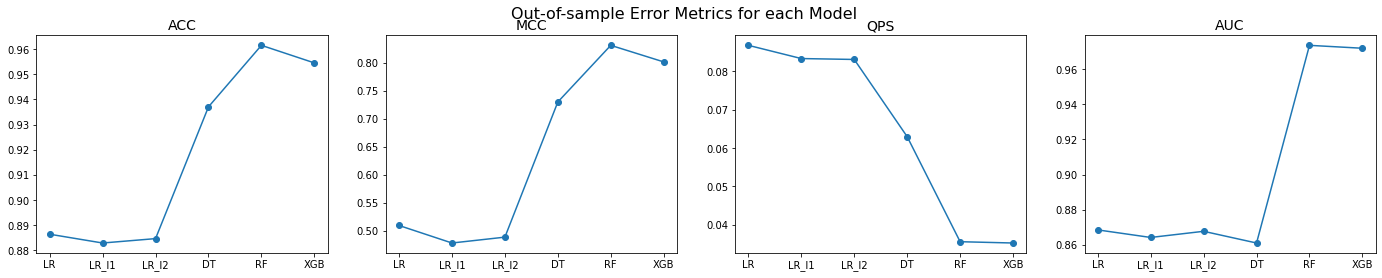

In [56]:
fig , axs = plt.subplots(1,4,figsize = (24,4))
for idx,name in enumerate(err_df_rolling.columns.drop('Model')):
    axs[idx].plot(err_df_rolling['Model'],err_df_rolling[name],marker ='o')
    axs[idx].set_title(name,fontsize =14)
plt.suptitle('Out-of-sample Error Metrics for each Model',fontsize =16)
plt.show()

In [60]:
list(model_dict.keys())

[('LR', sklearn.linear_model._logistic.LogisticRegression),
 ('LR_l1', sklearn.linear_model._logistic.LogisticRegression),
 ('LR_l2', sklearn.linear_model._logistic.LogisticRegression),
 ('DT', sklearn.tree._classes.DecisionTreeClassifier),
 ('RF', sklearn.ensemble._forest.RandomForestClassifier),
 ('XGB', xgboost.sklearn.XGBClassifier)]

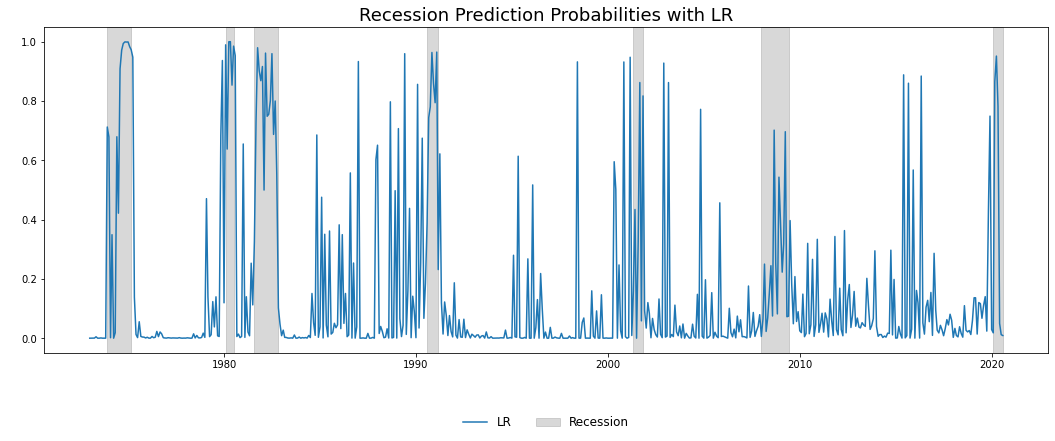

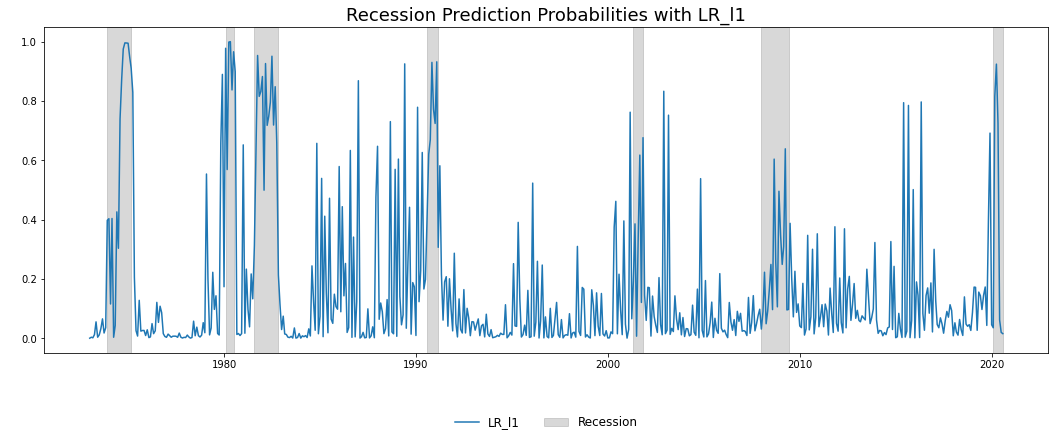

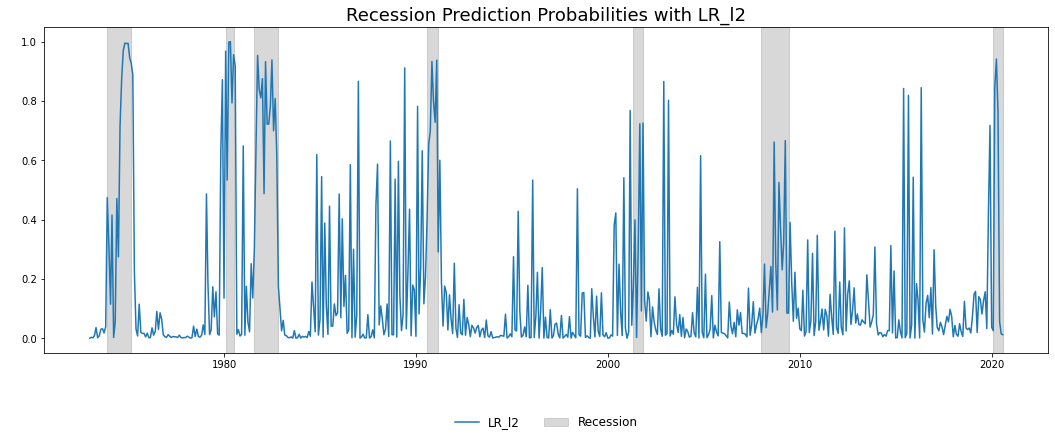

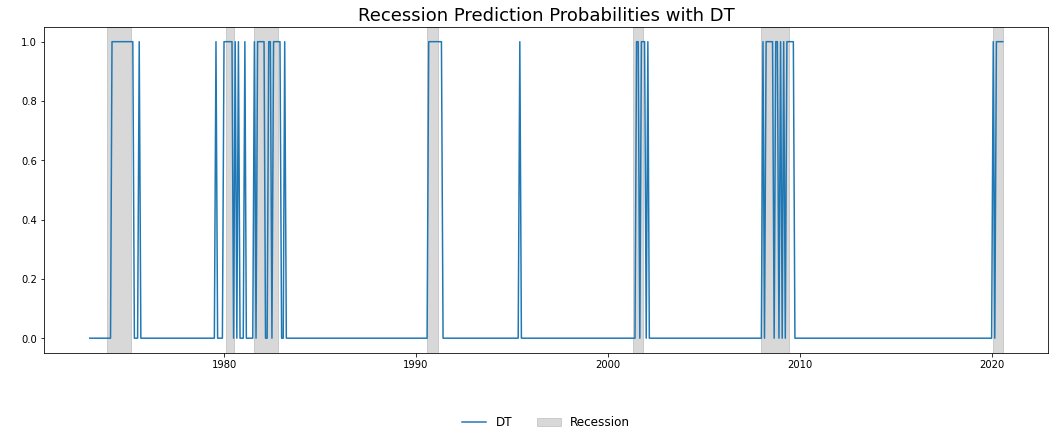

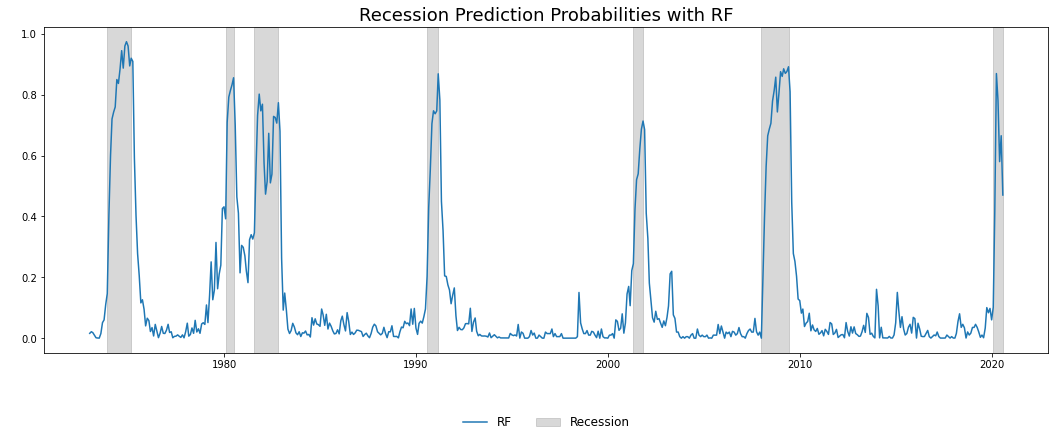

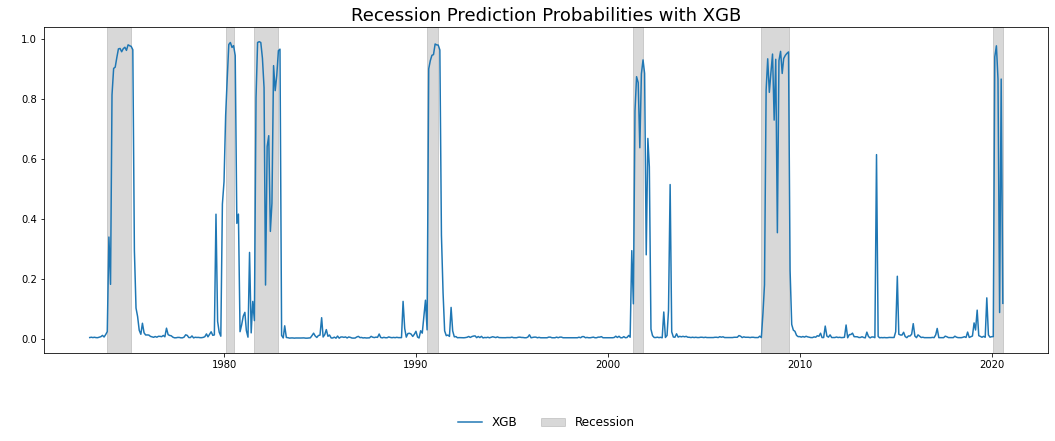

In [54]:
for model in list(model_dict.keys()):
    df = RegimePlot(df = res_rolling_all,regime_col='Regime')
    df.plt_regime(plt_series = [model[0]],series_label = [model[0]],regime_label = 'Recession',orj_series = True,log_scale = False,title = 'Recession Prediction Probabilities with '+model[0])

## References
1. **Hastie, T., R. Tibshirani, and J. Friedman** (2013)._The Elements of Statistical Learning._<a class="anchor" id="a"></a>

1. **De Prado, Marcos Lopez** (2018)._Advanced in Financial Machine Learning._<a class="anchor" id="a"></a>
